# Step 3: Apply neural networks

In [1]:
from config import models_isot_path
from helpers.metrics_plot import classification_summary

from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense, LSTM, Bidirectional
import pandas as pd
import joblib


## GRU

In [2]:
news = pd.read_csv("data/isot_news.csv")

max_words = 20000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(news['text'])

sequences = tokenizer.texts_to_sequences(news['text'])
X = pad_sequences(sequences, maxlen=max_len)

y = news['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
joblib.dump(tokenizer, f'{models_isot_path}/tokenizer_isot.joblib')


['models/isot/tokenizer_isot.joblib']

In [4]:
gru = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    GRU(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])

gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
gru.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          2560000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 2597313 (9.91 MB)
Trainable params: 2597313 (9.91 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
gru.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

loss, accuracy = gru.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.5f}")


Epoch 1/5
435/435 [==============================] - 40s 91ms/step - loss: 0.1304 - accuracy: 0.9532 - val_loss: 0.0557 - val_accuracy: 0.9854
Epoch 2/5
435/435 [==============================] - 40s 93ms/step - loss: 0.0234 - accuracy: 0.9933 - val_loss: 0.0849 - val_accuracy: 0.9712
Epoch 3/5
435/435 [==============================] - 41s 94ms/step - loss: 0.0174 - accuracy: 0.9951 - val_loss: 0.0918 - val_accuracy: 0.9773
Epoch 4/5
435/435 [==============================] - 42s 96ms/step - loss: 0.0099 - accuracy: 0.9970 - val_loss: 0.1044 - val_accuracy: 0.9767
Epoch 5/5
242/242 [==============================] - 3s 14ms/step - loss: 0.0489 - accuracy: 0.9878
Test Accuracy: 0.98783


242/242 [==============================] - 3s 13ms/step
Classification Report:
              precision    recall  f1-score   support

           0    0.98867   0.98409   0.98638      3458
           1    0.98715   0.99086   0.98900      4265

    accuracy                        0.98783      7723
   macro avg    0.98791   0.98748   0.98769      7723
weighted avg    0.98783   0.98783   0.98783      7723



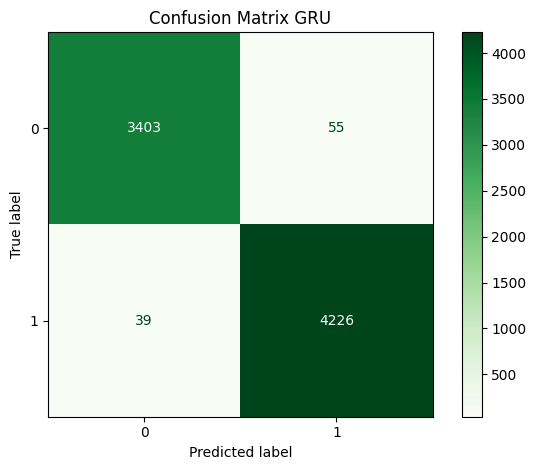

In [6]:
y_pred_probs = gru.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

classification_summary(y_test, y_pred, title="Confusion Matrix GRU", cmap="Greens")


In [7]:
gru.save(f"{models_isot_path}/gru.h5")


/Users/katerynamelnykova/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## LSTM

In [8]:
lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])


In [9]:
lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          2560000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2609473 (9.95 MB)
Trainable params: 2609473 (9.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
lstm.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

loss, accuracy = lstm.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.5f}")


Epoch 1/5
435/435 [==============================] - 56s 127ms/step - loss: 0.1230 - accuracy: 0.9581 - val_loss: 0.0680 - val_accuracy: 0.9796
Epoch 2/5
435/435 [==============================] - 55s 126ms/step - loss: 0.0331 - accuracy: 0.9900 - val_loss: 0.0586 - val_accuracy: 0.9825
Epoch 3/5
435/435 [==============================] - 54s 124ms/step - loss: 0.0269 - accuracy: 0.9917 - val_loss: 0.1352 - val_accuracy: 0.9524
Epoch 4/5
435/435 [==============================] - 54s 125ms/step - loss: 0.0277 - accuracy: 0.9926 - val_loss: 0.0883 - val_accuracy: 0.9731
Epoch 5/5
242/242 [==============================] - 5s 21ms/step - loss: 0.0747 - accuracy: 0.9836
Test Accuracy: 0.98356


242/242 [==============================] - 6s 22ms/step
Classification Report:
              precision    recall  f1-score   support

           0    0.99231   0.97079   0.98144      3458
           1    0.97673   0.99390   0.98524      4265

    accuracy                        0.98356      7723
   macro avg    0.98452   0.98235   0.98334      7723
weighted avg    0.98371   0.98356   0.98354      7723



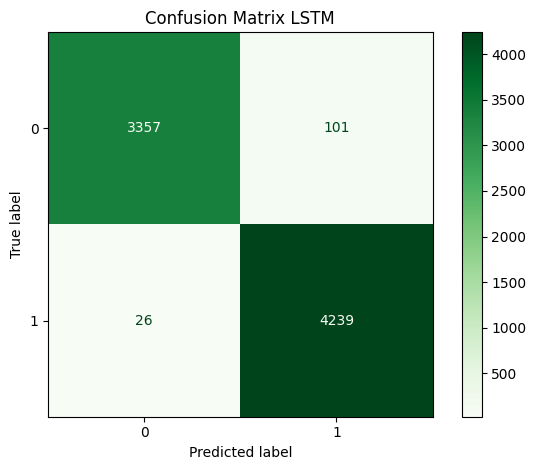

In [11]:
y_pred_probs = lstm.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

classification_summary(y_test, y_pred, title="Confusion Matrix LSTM", cmap="Greens")


In [12]:
lstm.save(f"{models_isot_path}/lstm.h5")


/Users/katerynamelnykova/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Bi-LSTM

In [13]:
bi_lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(1, activation='sigmoid')
])


In [14]:
bi_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
bi_lstm.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 128)          2560000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2658945 (10.14 MB)
Trainable params: 2658945 (10.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
bi_lstm.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

loss, accuracy = bi_lstm.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.5f}")


Epoch 1/5


435/435 [==============================] - 75s 170ms/step - loss: 0.1277 - accuracy: 0.9529 - val_loss: 0.0629 - val_accuracy: 0.9809
Epoch 2/5
435/435 [==============================] - 75s 172ms/step - loss: 0.0362 - accuracy: 0.9894 - val_loss: 0.0573 - val_accuracy: 0.9841
Epoch 3/5
435/435 [==============================] - 73s 167ms/step - loss: 0.0392 - accuracy: 0.9863 - val_loss: 0.0834 - val_accuracy: 0.9712
Epoch 4/5
435/435 [==============================] - 75s 172ms/step - loss: 0.0167 - accuracy: 0.9951 - val_loss: 0.0953 - val_accuracy: 0.9770
Epoch 5/5
242/242 [==============================] - 6s 23ms/step - loss: 0.0676 - accuracy: 0.9830
Test Accuracy: 0.98304


242/242 [==============================] - 6s 22ms/step
Classification Report:
              precision    recall  f1-score   support

           0    0.98400   0.97802   0.98100      3458
           1    0.98227   0.98710   0.98468      4265

    accuracy                        0.98304      7723
   macro avg    0.98313   0.98256   0.98284      7723
weighted avg    0.98304   0.98304   0.98303      7723



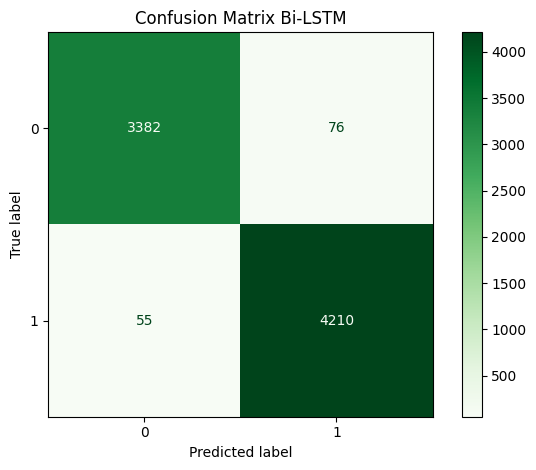

In [16]:
y_pred_probs = bi_lstm.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

classification_summary(y_test, y_pred, title="Confusion Matrix Bi-LSTM", cmap="Greens")


In [17]:
bi_lstm.save(f"{models_isot_path}/bi_lstm.h5")


/Users/katerynamelnykova/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
